# Chapter 6: Hypothesis Testing


In [1]:
import numpy as np
import pandas as pd

mutual_fund_data = pd.read_csv("Top100MutualFunds.csv")
mutual_fund_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [2]:
mutual_fund_data["Category3"].value_counts()

Large cap                 88
Mid cap                    9
Health care                1
Communication Services     1
Small cap                  1
Name: Category3, dtype: int64

In [3]:
mutual_fund_data.groupby("Category3").mean()

,Morningstar Rating
Category3,
Communication Services,5.000000
Health care,5.000000
Large cap,3.658824
Mid cap,4.000000
Small cap,4.000000


In [4]:
mutual_fund_data["Morningstar Rating"].value_counts(normalize = True)

3.0    0.432990
4.0    0.350515
5.0    0.195876
2.0    0.020619
Name: Morningstar Rating, dtype: float64

In [5]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime
mutual_fund_dict = {}
symbols = list(mutual_fund_data["Symbol"])
start = datetime(1980, 1,1)
end = datetime(2020, 1, 1)
print((start, end, symbols))

(datetime.datetime(1980, 1, 1, 0, 0), datetime.datetime(2020, 1, 1, 0, 0), ['AGTHX', 'FCNTX', 'CWMAX', 'CWMCX', 'CWMEX', 'CWMFX', 'AIVSX', 'AWSHX', 'ANCFX', 'AMCFX', 'CAFAX', 'CAFCX', 'CAFEX', 'CAFFX', 'FMACX', 'TRBCX', 'AFMFX', 'AMRFX', 'CMLAX', 'CMLCX', 'CMLEX', 'CMLFX', 'FDGRX', 'FBGRX', 'AMCPX', 'EAGRX', 'AMRMX', 'FMAGX', 'HACAX', 'FLPSX', 'PRGFX', 'PRNHX', 'DFQTX', 'DFEOX', 'FLPKX', 'RPMGX', 'FOCPX', 'CNGAX', 'CNGCX', 'CNGEX', 'CNGFX', 'FNEFX', 'FOCKX', 'DFLVX', 'CDDRX', 'CDDYX', 'CDIRX', 'CVIRX', 'TWCUX', 'EGFFX', 'EGFIX', 'ANEFX', 'HLIEX', 'FRDPX', 'FRDAX', 'FRDRX', 'FRISX', 'PRHSX', 'PRILX', 'DDFIX', 'DDFRX', 'VAFAX', 'PCBIX', 'FCGAX', 'FGSRX', 'FIFRX', 'PRFDX', 'PRBLX', 'JVMIX', 'VWNFX', 'FKGRX', 'PRDGX', 'AULDX', 'AULGX', 'AULNX', 'AULRX', 'AULYX', 'AKRSX', 'MFEIX', 'POLIX', 'FKDNX', 'MADVX', 'VWUSX', 'LSGRX', 'SEEGX', 'PRMTX', 'CUSUX', 'ERASX', 'ERSMX', 'DFSVX', 'CMGIX', 'SBLYX', 'AKRIX', 'MFEGX', 'FDNRX', 'FDTRX', 'FDYZX', 'BBVLX', 'PEYAX', 'TWCGX'])


In [6]:
yf.pdr_override()
fund_data = web.get_data_yahoo(symbols, start, end)

[*********************100%***********************]  100 of 100 completed


In [7]:
close_data = fund_data["Adj Close"]
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,PRNHX,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723485,...,0.599536,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,0.588704,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730549,...,0.595769,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733576,...,0.580033,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751738,...,0.586269,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097603,43.498634,33.953674,41.269051,41.468189,28.316504,28.111416,38.230675,38.514610,51.184906,...,42.597168,80.298607,43.188068,32.569065,106.341019,29.883804,43.968906,14.698990,29.131346,36.265900
2019-12-26,38.185299,43.719612,34.099625,41.387012,41.586231,28.408524,28.203419,38.318684,38.603237,51.416252,...,42.654209,80.374329,43.536549,32.785179,107.248009,30.146879,44.383232,14.812883,29.243483,36.535656
2019-12-27,38.211605,43.711113,34.099625,41.441456,41.640713,28.400154,28.186689,38.345085,38.629822,51.465828,...,42.504475,80.290184,43.512787,32.761169,107.316467,30.130444,44.357861,14.819583,29.243483,36.501934


In [8]:
close_data["S&P 500"] = web.get_data_yahoo("^GSPC", start, end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


C:\Users\JLCat\AppData\Local\Temp\ipykernel_9128\2240962843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data["S&P 500"] = web.get_data_yahoo("^GSPC", start, end)["Adj Close"]


In [9]:
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723485,...,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897,105.760002
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897,105.220001
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730549,...,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897,106.519997
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733576,...,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897,106.809998
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751738,...,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897,108.949997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097603,43.498634,33.953674,41.269051,41.468189,28.316504,28.111416,38.230675,38.514610,51.184906,...,80.298607,43.188068,32.569065,106.341019,29.883804,43.968906,14.698990,29.131346,36.265900,3223.379883
2019-12-26,38.185299,43.719612,34.099625,41.387012,41.586231,28.408524,28.203419,38.318684,38.603237,51.416252,...,80.374329,43.536549,32.785179,107.248009,30.146879,44.383232,14.812883,29.243483,36.535656,3239.909912
2019-12-27,38.211605,43.711113,34.099625,41.441456,41.640713,28.400154,28.186689,38.345085,38.629822,51.465828,...,80.290184,43.512787,32.761169,107.316467,30.130444,44.357861,14.819583,29.243483,36.501934,3240.020020


Text(0.5, 1.0, 'Index Returns Relative to Market Return')

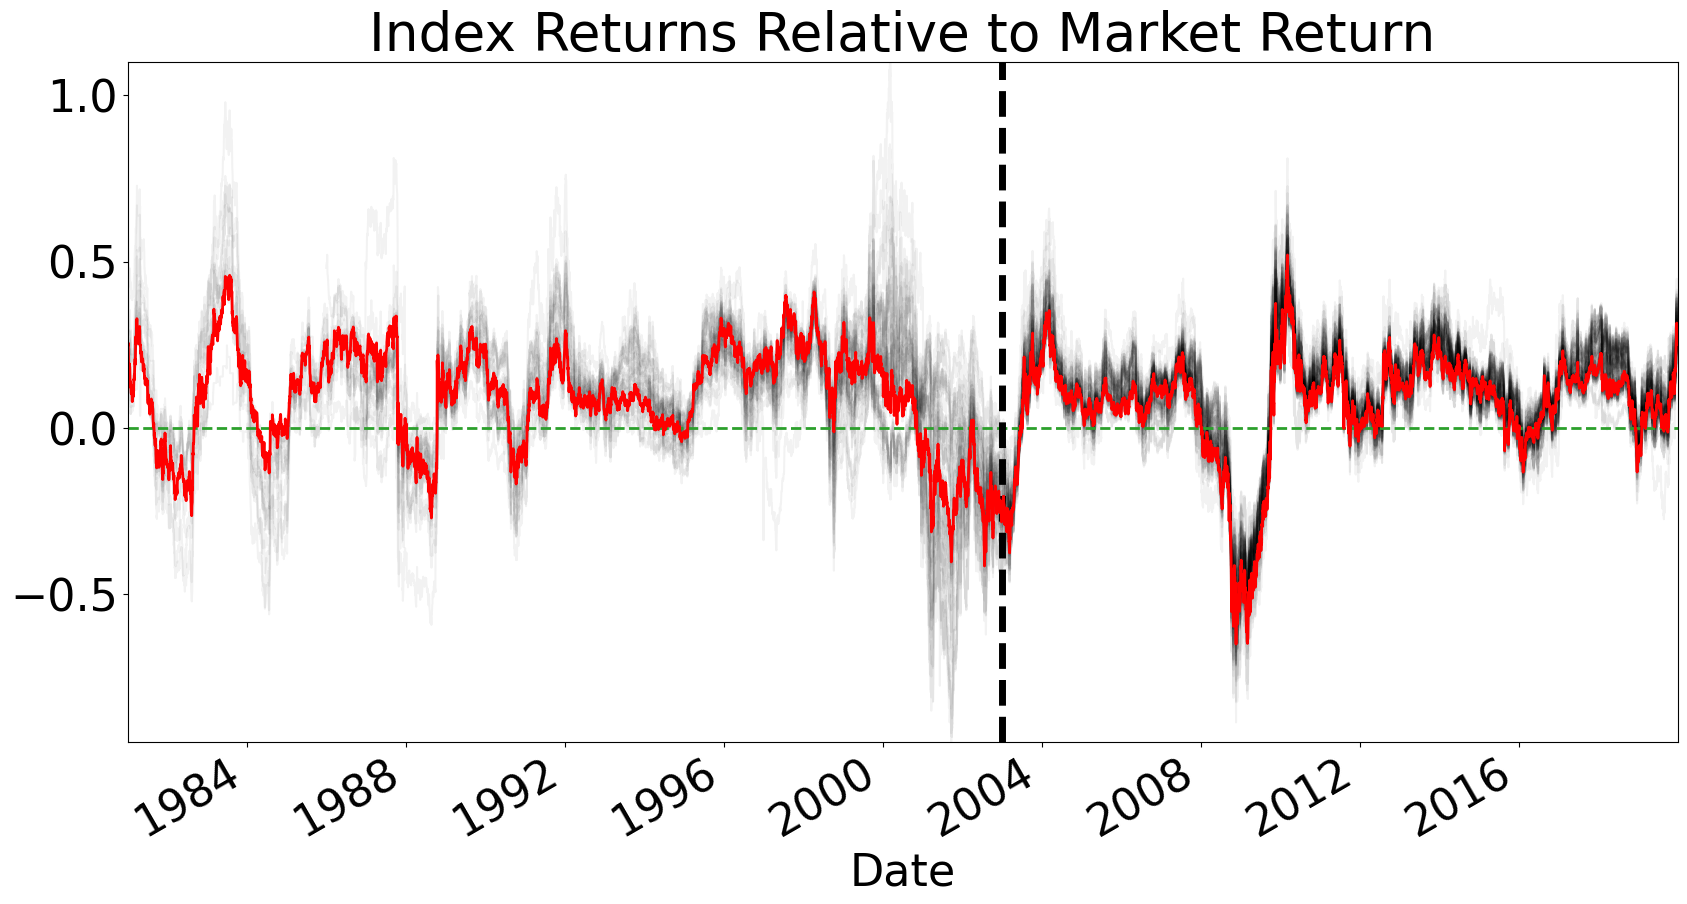

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0  
# year over year rates of change are easier to interpret
days_per_year = 251
yoy_return = np.log(close_data).diff(days_per_year)
fig, ax = plt.subplots(figsize = (20,10))
yoy_return.plot.line(legend = False, color = "k", alpha = .05, ax = ax)
ax.axhline(0, ls = "--", color = "C2",linewidth = 2)
ax.axvline("2003", ls = "--", color = "k",linewidth = 5)

yoy_return["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)
plt.rcParams.update({'font.size': 32})
ax.set_title("Index Returns Relative to Market Return")

Text(0.5, 1.0, 'Index Returns Relative to Market Return')

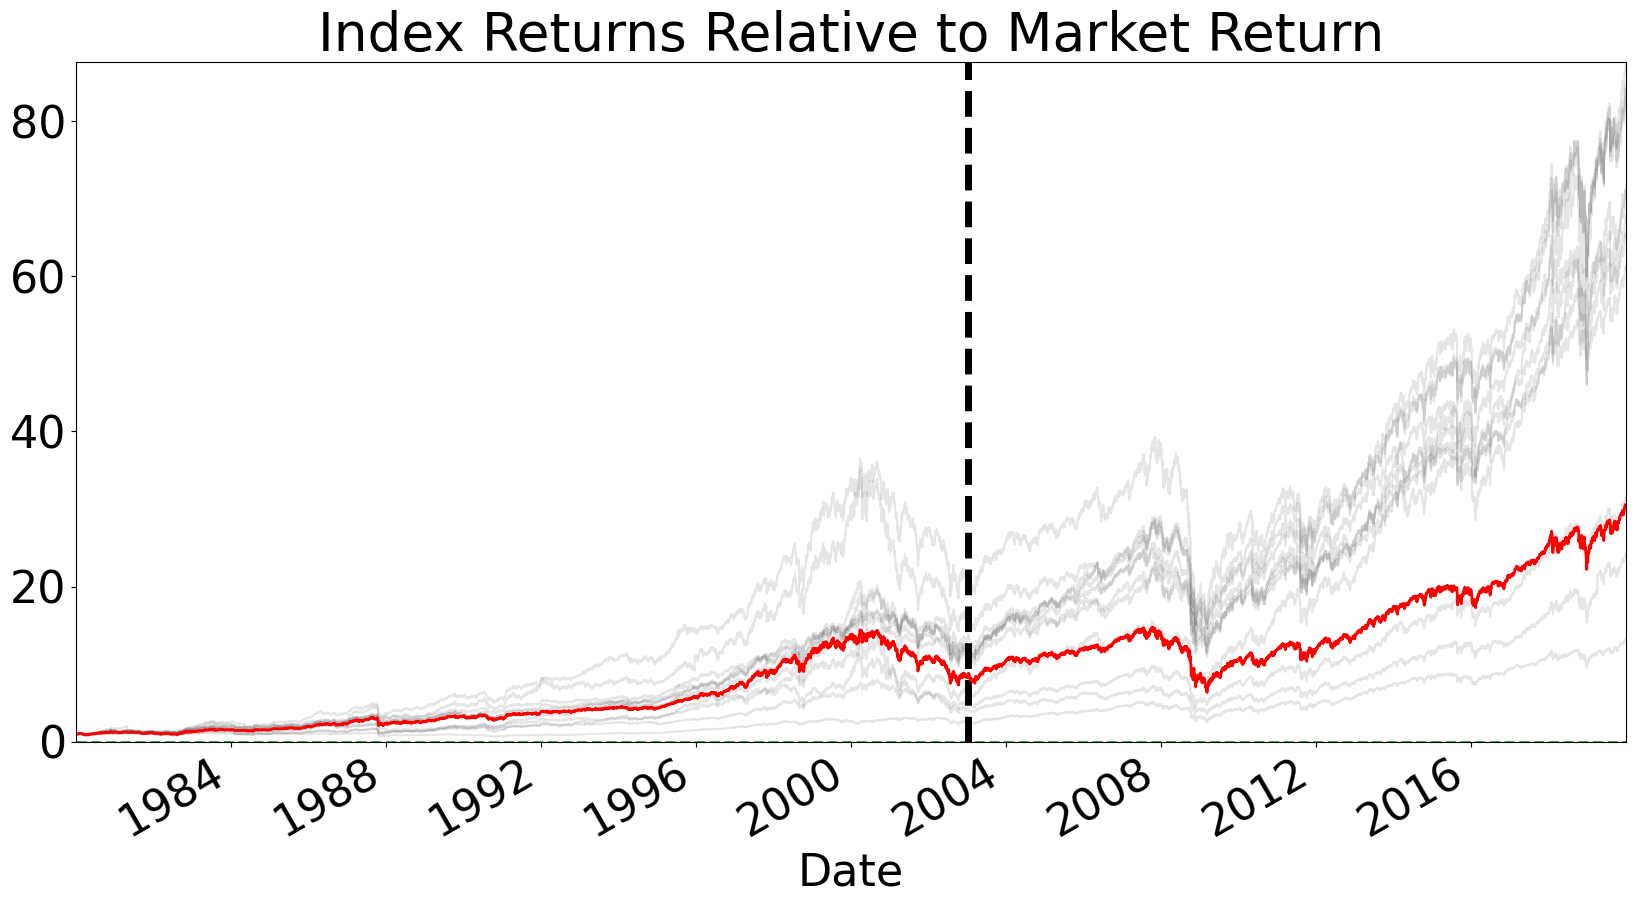

In [13]:
norm_data = close_data.div(close_data.iloc[0])
fig, ax = plt.subplots(figsize = (20,10))
norm_data.plot.line(legend = False, color = "k", alpha = .1, ax = ax)
ax.axhline(0, ls = "--", color = "C2",linewidth = 2)
ax.axvline("2003", ls = "--", color = "k",linewidth = 5)

norm_data["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)
plt.rcParams.update({'font.size': 32})
ax.set_title("Index Returns Relative to Market Return")

In [12]:
# for year in range(1980,2021):
#     year = str(year)
#     print(close_data.loc[str(year)].shape[0])